# Método variacional lineal

**Paso 1.** Elijo funciones $\psi_i$ para $\psi_{prueba}$
\begin{equation}
\psi_{prueba} = \sum_{i=1} c_i \psi_i  
\end{equation}

Para este ejemplo tomaremos dos funciones:
\begin{equation}
\psi_1 = \left( \frac{2(1.309756377)}{\pi} \right)^{\frac{3}{4}} e^{-1.309756377r^2}
\end{equation}
\begin{equation}
\psi_2 = \left( \frac{2(0.233135974)}{\pi} \right)^{\frac{3}{4}} e^{-0.233135974r^2}
\end{equation}


In [1]:
import numpy as np
import sympy as sp

sp.init_printing()

r = sp.Symbol("r")
psi_1 = (2*1.309756377/sp.pi)**(3.0/4.0)*sp.exp(-1.309756377*r**2) 
psi_2 =  
sp.pprint(psi_1)
sp.pprint(psi_2)

                                       2
                  -0.75  -1.309756377⋅r 
2.05904286572975⋅π     ⋅ℯ               
                                        2
                   -0.75  -0.233135974⋅r 
0.564260261842472⋅π     ⋅ℯ               


**Paso 2.** Evalúo las matrices $\mathcal{H}$ y $\mathcal{S}$.

En este ejemplo recordaremos que
\begin{equation}
\hat{H} = -\frac{1}{2} \nabla^2 - \frac{1}{r} = -\frac{1}{2} \frac{1}{r} \frac{d^2}{dr^2} r -\frac{1}{r}
\end{equation}

\begin{equation}
\mathcal{H} = \begin{pmatrix} H_{11} & H_{12}\\
H_{21} & H_{22}
\end{pmatrix} = \begin{pmatrix} 4 \pi\int_0^\infty \psi_1^* \hat{H} \psi_1 r^2dr & 4 \pi\int_0^\infty \psi_1^* \hat{H} \psi_2 r^2dr\\
4 \pi\int_0^\infty \psi_2^* \hat{H} \psi_1 r^2dr & 4 \pi\int_0^\infty \psi_2^* \hat{H} \psi_2 r^2dr
\end{pmatrix}
\end{equation}

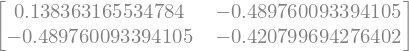

In [2]:
H_1 = -1/2*1/r*sp.diff(r*psi_1,r,r) - 1/r*psi_1
H_2 = -1/2*1/r*sp.diff(r*psi_2,r,r) - 1/r*psi_2

#sp.pprint(H_1)
#sp.pprint(H_2)

H = sp.zeros(2)
#sp.pprint(H)
H[0,0] = 4*sp.pi*sp.integrate(psi_1*H_1*r**2,(r,0,sp.oo))
#sp.pprint(H[0,0])
H[0,1] = 4*sp.pi*sp.integrate(psi_1*H_2*r**2,(r,0,sp.oo))
H[1,0] = 
H[1,1] = 
H=H.evalf()
H

\begin{equation}
\mathcal{S} = \begin{pmatrix} S_{11} & S_{12}\\
S_{21} & S_{22}
\end{pmatrix} = \begin{pmatrix} 4 \pi\int_0^\infty \psi_1^* \psi_1 r^2dr & 4 \pi\int_0^\infty \psi_1^* \psi_2 r^2dr\\
4 \pi\int_0^\infty \psi_2^* \psi_1 r^2dr & 4 \pi\int_0^\infty \psi_2^* \psi_2 r^2dr
\end{pmatrix}
\end{equation}

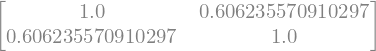

In [3]:
S = sp.zeros(2)
S[0,0] = 4*sp.pi*sp.integrate(r**2*psi_1*psi_1,(r,0,sp.oo))
S[0,1] = 
S[1,0] = 
S[1,1] = 
S

**Paso 3.** Resuelvo $\color{red}{\mathcal{H}\mathcal{C} = \mathcal{S}\mathcal{C} \mathcal{\epsilon}}$

Propongo $\mathcal{C} = \mathcal{S}^{-1/2} \mathcal{C}'$

Entonces: 
\begin{equation}
\mathcal{H}\mathcal{S}^{-1/2} \mathcal{C}' = \mathcal{S}\mathcal{S}^{-1/2} \mathcal{C}' \mathcal{\epsilon}
\end{equation}

Multiplico por la izquierda por $\mathcal{S}^{-1/2}$:
\begin{equation}
\mathcal{S}^{-1/2} \mathcal{H}\mathcal{S}^{-1/2} \mathcal{C}' = \mathcal{S}^{-1/2} \mathcal{S}\mathcal{S}^{-1/2} \mathcal{C}' \mathcal{\epsilon}
\end{equation}

Si $\mathcal{H}' = \mathcal{S}^{-1/2} \mathcal{H}\mathcal{S}^{-1/2}$:
\begin{equation}
\mathcal{H}' \mathcal{C}' = \mathcal{C}' \mathcal{\epsilon}
\end{equation}

Alternativamente, la instrucción
~~~python
E,C = LA.eigh(H,S)
~~~
resuelve directamente el problema $\mathcal{H}\mathcal{C} = \mathcal{S}\mathcal{C} \mathcal{\epsilon}$

In [4]:
from scipy import linalg as LA
import numpy

H = np.array(H).astype(np.float64)
S = 

E,C = 
print(E)
print(C)

[-0.4831514   0.97547404]
[[-0.2599737  -1.23024195]
 [-0.82078782  0.95256965]]


**Paso 4.** Sustituyo en $$\psi_{prueba} = \sum_{i=1} c_i \psi_i$$

In [5]:
psi_p = 

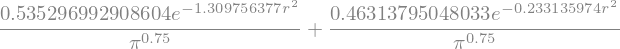

In [6]:
psi_p

Se puede comprobar que se cumple la condición de normalización
\begin{equation}
4\pi \int_0^{\infty} r^2 |\psi_{prueba}|^2 dr= 1
\end{equation}

In [7]:
4*sp.pi*sp.integrate(psi_p*psi_p*r**2,(r,0,sp.oo))

Separamos la función de prueba como Gaussiana, así como sus contribuciones para comparar.

In [8]:
psi_2g = psi_p
psi_2g_1 = psi_1
psi_2g_2 = psi_2

Graficamos las dos funciones $\psi_1$ y $\psi_2$, así como la $\psi_{prueba}$ y la solución exacta para el átomo de hidrógeno (1s). Recordar que
\begin{equation}
1s = \pi^{-1/2} e^{-|r|}
\end{equation}

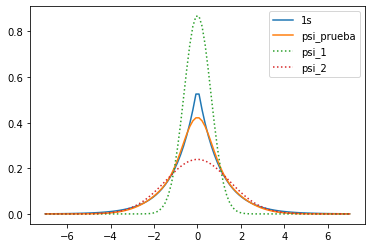

In [9]:
from matplotlib import pyplot as plt

#Volvemos expresiones evaluables las cuatro funciones
s=1/sp.sqrt(sp.pi)*sp.exp(-sp.Abs(r))
lam_s = sp.lambdify(r,s,modules=['numpy'])
lam_psi_2g = sp.lambdify(r,psi_2g,modules=['numpy'])
lam_psi_2g_1 = sp.lambdify(r,psi_2g_1,modules=['numpy'])
lam_psi_2g_2 = sp.lambdify(r,psi_2g_2,modules=['numpy'])

#Evaluamos las cuatro funciones en un dominio de r
r1 = 
psi_s = lam_s(r1)
psi_2g1 = lam_psi_2g(r1)
psi_2g_1 = 
psi_2g_2 = 

#Graficamos
plt.plot(r1,psi_s,label="1s")
plt.plot(r1,psi_2g1,label="psi_prueba")
plt.plot(r1,        ,label="psi_1",linestyle=':')
plt.plot(r1,        ,label="psi_2",linestyle=':')
plt.legend()
plt.show()

# Con tres Gaussiana

**Paso 1.**

In [10]:
import numpy as np
import sympy as sp

sp.init_printing()

r = sp.Symbol("r")
psi_1 = (2*3.42525091/sp.pi)**(3/4)*sp.exp(-3.42525091*r**2)
psi_2 = (2*0.62391373/sp.pi)**(3/4)*sp.exp(-0.62391373*r**2)
psi_3 = (2*0.16885540/sp.pi)**(3/4)*sp.exp(-0.16885540*r**2)
print("psi_1")
sp.pprint(psi_1)
print("psi_2")
sp.pprint(psi_2)
print("psi_3")
sp.pprint(psi_3)

psi_1
                                      2
                  -0.75  -3.42525091⋅r 
4.23439910835034⋅π     ⋅ℯ              
psi_2
                                     2
                 -0.75  -0.62391373⋅r 
1.1806356801173⋅π     ⋅ℯ              
psi_3
                                      2
                   -0.75  -0.1688554⋅r 
0.443005085955685⋅π     ⋅ℯ             


**Paso 2.**

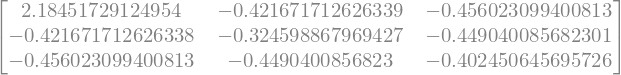

In [11]:
H_1 = -1/2*1/r*sp.diff(r*psi_1,r,r) - 1/r*psi_1
H_2 = -1/2*1/r*sp.diff(r*psi_2,r,r) - 1/r*psi_2
H_3 = -1/2*1/r*sp.diff(r*psi_3,r,r) - 1/r*psi_3
#
H = 
H[0,0] = 
H[0,1] = 
H[0,2] = 
H[1,0] = 
H[1,1] = 
H[1,2] = 
H[2,0] = 
H[2,1] = 
H[2,2] = 

H=H.evalf()
H

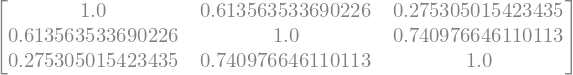

In [12]:
#
S = 
S[0,0] = 
S[0,1] = 
S[0,2] = 
S[1,0] = 
S[1,1] = 
S[1,2] = 
S[2,0] = 
S[2,1] = 
S[2,2] = 
S

**Paso3.**

In [13]:
from scipy import linalg as LA

H = 
S = 

E,C = 
print(E)
print(C)

[-0.4957408   0.32474441  4.70775684]
[[ 0.09347468  0.06200336 -1.34099753]
 [ 0.37301543  1.35732612  1.31521322]
 [ 0.64687893 -1.33378635 -0.55358619]]


**Paso 4.**

In [14]:
psi_p = 

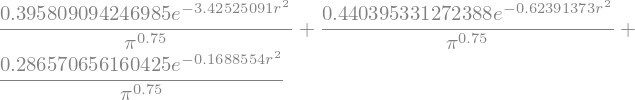

In [15]:
psi_p

In [16]:
4*sp.pi*sp.integrate(psi_p*psi_p*r**2,(r,0,sp.oo))

In [17]:
psi_3g = psi_p
psi_3g_1 = psi_1
psi_3g_2 = psi_2
psi_3g_3 = psi_3

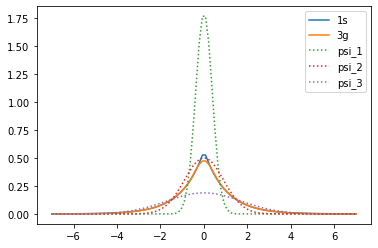

In [18]:
from matplotlib import pyplot as plt

s=1/sp.sqrt(sp.pi)*sp.exp(-sp.Abs(r))
lam_s = sp.lambdify(r,s,modules=['numpy'])
lam_psi_3g = sp.lambdify(r,psi_3g,modules=['numpy'])
lam_psi_3g_1 = sp.lambdify(r,psi_3g_1,modules=['numpy'])
lam_psi_3g_2 = sp.lambdify(r,psi_3g_2,modules=['numpy'])
lam_psi_3g_3 = sp.lambdify(r,psi_3g_3,modules=['numpy'])

r1 = np.linspace(-7,7,100)
psi_s = 
psi_3g1 = 
psi_3g_1 = 
psi_3g_2 = 
psi_3g_3 = 

plt.plot(r1,     ,label="1s")
plt.plot(r1,       ,label="3g")
plt.plot(r1,        ,label="psi_1",linestyle=':')
plt.plot(r1,        ,label="psi_2",linestyle=':')
plt.plot(r1,        ,label="psi_3",linestyle=':')
plt.legend()
plt.show()

# Graficamos

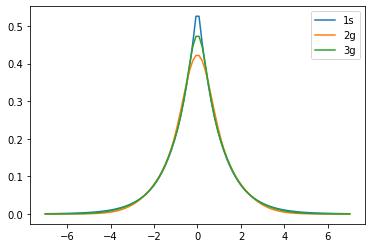

In [19]:
from matplotlib import pyplot as plt

s=1/sp.sqrt(sp.pi)*sp.exp(-sp.Abs(r))
lam_s = sp.lambdify(r,s,modules=['numpy'])
lam_psi_2g = sp.lambdify(r,psi_2g,modules=['numpy'])
lam_psi_3g = sp.lambdify(r,psi_3g,modules=['numpy'])

r1 = np.linspace(-7,7,100)
psi_s = lam_s(r1)
psi_2g1 = lam_psi_2g(r1)
psi_3g1 = lam_psi_3g(r1)

plt.plot(r1,psi_s,label="1s")
plt.plot(r1,psi_2g1,label="2g")
plt.plot(r1,psi_3g1,label="3g")
plt.legend()
plt.show()

# Referencias

- Atkins, P. W.; Friedman, R. Molecular Quantum Mechanics, 4th ed.; Oxford University Press: New York, 2005.
- Pilar, F. L. Elementary Quantum Chemistry; 2001.
- Zettili, N. Quantum Mechanics: Concepts and Applications, 2nd ed.; Wiley: Chichester, U.K, 2009.
- Levine, I. N. Quantum Chemistry, 5th ed.; Prentice Hall: Upper Saddle River, N.J, 2000.
- McQuarrie, D. A.; Simon, J. D. Physical Chemistry: A Molecular Approach; University Science Books: Sausalito, Calif, 1997.

Hecho por Juan Felipe Huan Lew Yee y Jorge Martín del Campo Ramírez para la clase de Química Cuántica I del ciclo 2019-I. Universidad Nacional Autónoma de México.

Este archivo puede distribuise libremente y ser considerado Open Source. Si deseas modificarlo para su distribución, solo se pide conservar el nombre de los autores originales.